<a href="https://colab.research.google.com/github/c17h20n4s/pytorch_1/blob/main/pytorch_initial_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# For tips on running notebooks in Google Colab, see
# https://docs.pytorch.org/tutorials/beginner/colab
%matplotlib inline

**Learn the Basics** \|\| [Quickstart](quickstart_tutorial.html) \|\|
[Tensors](tensorqs_tutorial.html) \|\| [Datasets &
DataLoaders](data_tutorial.html) \|\|
[Transforms](transforms_tutorial.html) \|\| [Build
Model](buildmodel_tutorial.html) \|\|
[Autograd](autogradqs_tutorial.html) \|\|
[Optimization](optimization_tutorial.html) \|\| [Save & Load
Model](saveloadrun_tutorial.html)

Learn the Basics
================

Authors: [Suraj Subramanian](https://github.com/subramen), [Seth
Juarez](https://github.com/sethjuarez/), [Cassie
Breviu](https://github.com/cassiebreviu/), [Dmitry
Soshnikov](https://soshnikov.com/), [Ari
Bornstein](https://github.com/aribornstein/)

Most machine learning workflows involve working with data, creating
models, optimizing model parameters, and saving the trained models. This
tutorial introduces you to a complete ML workflow implemented in
PyTorch, with links to learn more about each of these concepts.

We\'ll use the FashionMNIST dataset to train a neural network that
predicts if an input image belongs to one of the following classes:
T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker,
Bag, or Ankle boot.

[This tutorial assumes a basic familiarity with Python and Deep Learning
concepts.]{.title-ref}

Running the Tutorial Code
-------------------------

You can run this tutorial in a couple of ways:

-   **In the cloud**: This is the easiest way to get started! Each
    section has a \"Run in Microsoft Learn\" and \"Run in Google Colab\"
    link at the top, which opens an integrated notebook in Microsoft
    Learn or Google Colab, respectively, with the code in a fully-hosted
    environment.
-   **Locally**: This option requires you to setup PyTorch and
    TorchVision first on your local machine ([installation
    instructions](https://pytorch.org/get-started/locally/)). Download
    the notebook or copy the code into your favorite IDE.

How to Use this Guide
---------------------

If you\'re familiar with other deep learning frameworks, check out the
[0. Quickstart](quickstart_tutorial.html) first to quickly familiarize
yourself with PyTorch\'s API.

If you\'re new to deep learning frameworks, head right into the first
section of our step-by-step guide: [1. Tensors](tensorqs_tutorial.html).

::: {.toctree maxdepth="2" hidden=""}
quickstart\_tutorial tensorqs\_tutorial data\_tutorial
transforms\_tutorial buildmodel\_tutorial autogradqs\_tutorial
optimization\_tutorial saveloadrun\_tutorial
:::


In [ ]:
import torch

In [ ]:
import numpy as np

In [ ]:
data = [[1,2], [3,4]]
x = torch.tensor(data)
print(x)

tensor([[1, 2],
        [3, 4]])


In [ ]:
shape = (2,3 )
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

In [ ]:
print(f"\n Random tensors: {rand_tensor}")


 Random tensors: tensor([[0.9089, 0.0642, 0.4198],
        [0.0183, 0.6469, 0.4808]])


In [ ]:
print(f"\n Ones tensor: {ones_tensor}")


 Ones tensor: tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [ ]:
print(f"\n Zeros tensor: {zeros_tensor}")


 Zeros tensor: tensor([[0., 0., 0.],
        [0., 0., 0.]])


## Attributes of Tensor

In [ ]:
tensor = torch.rand(3,5)

In [ ]:
print(tensor.shape)
print(tensor.dtype)
print(tensor.device)

torch.Size([3, 5])
torch.float32
cpu


## Operations on tensors (or should I say - manipulations of tensors)

In [ ]:
if torch.accelerator.is_available():
  tensor = tensor.to(torch.accelerator.current_accelerator())

## Standart numpy slicing

In [ ]:
tensor = torch.rand(3,4)
tensor[0,3] = 5
print(tensor)

tensor([[0.6852, 0.7241, 0.9130, 5.0000],
        [0.0656, 0.5675, 0.5021, 0.6093],
        [0.5422, 0.7525, 0.7748, 0.7824]])


## Adding

In [ ]:
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(t1)

tensor([[0.6852, 0.7241, 0.9130, 5.0000, 0.6852, 0.7241, 0.9130, 5.0000, 0.6852,
         0.7241, 0.9130, 5.0000],
        [0.0656, 0.5675, 0.5021, 0.6093, 0.0656, 0.5675, 0.5021, 0.6093, 0.0656,
         0.5675, 0.5021, 0.6093],
        [0.5422, 0.7525, 0.7748, 0.7824, 0.5422, 0.7525, 0.7748, 0.7824, 0.5422,
         0.7525, 0.7748, 0.7824]])


## Matrix multiplications

In [ ]:
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)

tensor([[26.8273,  3.9609,  5.5354],
        [ 3.9609,  0.9497,  1.3283],
        [ 5.5354,  1.3283,  2.0725]])

## okaaaay, lets gooo

## MNIST Fashion dataset check

In [ ]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)


100%|██████████| 26.4M/26.4M [00:01<00:00, 16.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 270kB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 5.01MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 30.8MB/s]


In [ ]:
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Labeling

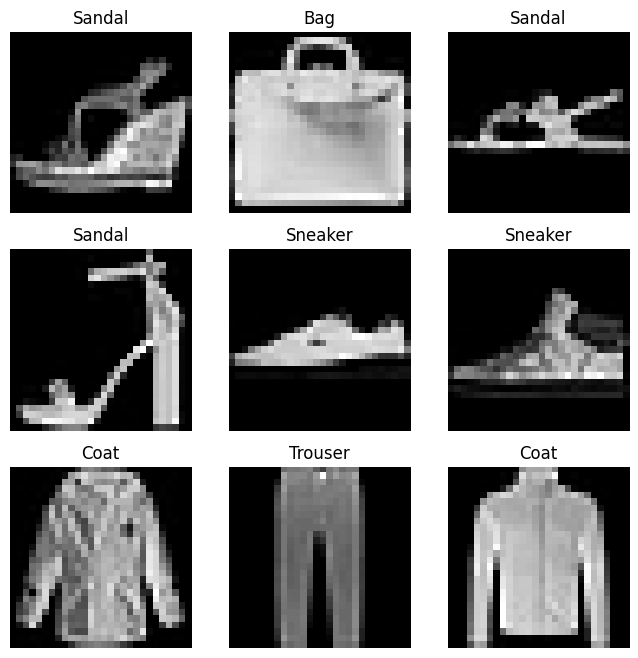

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure= plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [ ]:
import os
import pandas as pd
from torchvision.io import decode_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = decode_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [ ]:
def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

In [ ]:
def __getitem__(self, idx):
    img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
    image = decode_image(img_path)
    label = self.img_labels.iloc[idx, 1]
    if self.transform:
        image = self.transform(image)
    if self.target_transform:
        label = self.target_transform(label)
    return image, label

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


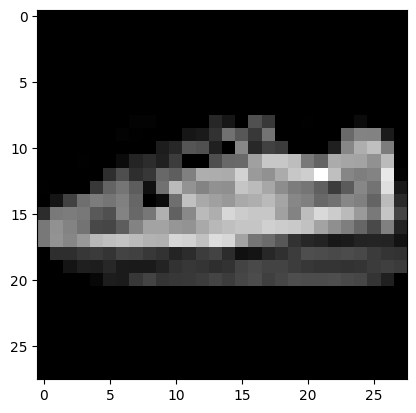

Label: 7


In [ ]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## Transforms

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## Building the model

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [ ]:
X = torch.rand(1, 28, 28, device=device)
logits = model(X)
pred_probab = nn.Softmax(dim=1)(logits)
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([7])


### layers

In [ ]:
input_image = torch.rand(3,28,28)
print(input_image.size())

torch.Size([3, 28, 28])


In [ ]:
flatten = nn.Flatten()
flat_image = flatten(input_image)
print(flat_image.size())

torch.Size([3, 784])


In [ ]:
layer1 = nn.Linear(in_features=28*28, out_features=20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[-0.5410, -0.1089, -0.0985,  0.3448, -0.1368,  0.0736,  0.0577,  0.2245,
         -0.6506,  0.1426,  0.4933, -0.1526, -0.3701,  0.3075, -0.7287, -0.3218,
          0.1977, -0.2936,  0.4214,  0.5369],
        [-0.1613,  0.0689, -0.0726,  0.2735, -0.0346, -0.1632,  0.1391,  0.2393,
         -0.7974,  0.4844,  0.4289, -0.3787, -0.3393,  0.2033, -0.4479, -0.0608,
          0.1941, -0.5644,  0.7477,  0.3335],
        [-0.3017, -0.0863, -0.0095,  0.3389, -0.2728, -0.0525,  0.3187,  0.0145,
         -0.7915, -0.1442,  0.5755,  0.0026, -0.2749,  0.5448, -0.3993, -0.6146,
          0.4370, -0.2311,  0.4372,  0.3765]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.0000, 0.0000, 0.3448, 0.0000, 0.0736, 0.0577, 0.2245, 0.0000,
         0.1426, 0.4933, 0.0000, 0.0000, 0.3075, 0.0000, 0.0000, 0.1977, 0.0000,
         0.4214, 0.5369],
        [0.0000, 0.0689, 0.0000, 0.2735, 0.0000, 0.0000, 0.1391, 0.2393, 0.0000,
         0.4844, 0.4289, 0.0000, 0.0000, 0.2033, 0.00

In [ ]:
seq_modules = nn.Sequential(
    flatten,
    layer1,
    nn.ReLU(),
    nn.Linear(20, 10)
)
input_image = torch.rand(3,28,28)
logits = seq_modules(input_image)

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probab = softmax(logits)

### Model parameters

In [ ]:
print(f"Model structure: {model}\n\n")

for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[-0.0225, -0.0109,  0.0305,  ...,  0.0150,  0.0148, -0.0103],
        [-0.0203, -0.0259, -0.0215,  ...,  0.0183,  0.0292,  0.0217]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([-0.0295,  0.0225], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[ 0.0221,  0.0362, -0.0341,  ...,  0.0385, -0.0313, -0.0367],
        [ 0.0268, -0.0213, -0.0396,  ...,  0.0200,  0.0423, -0.0284]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | 

## Autograd

In [ ]:
x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True)
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y)

In [ ]:
loss.backward()
print(w.grad)
print(b.grad)

tensor([[0.2551, 0.0084, 0.0318],
        [0.2551, 0.0084, 0.0318],
        [0.2551, 0.0084, 0.0318],
        [0.2551, 0.0084, 0.0318],
        [0.2551, 0.0084, 0.0318]])
tensor([0.2551, 0.0084, 0.0318])


## The model

In [ ]:
from torch import nn

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    def forward(self, x):
      x = self.flatten(x)
      logits = self.linear_relu_stack(x)
      return logits

model = NeuralNetwork()

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [ ]:
loss_fn = nn.CrossEntropyLoss()

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.323593  [   64/60000]
loss: 2.296960  [ 6464/60000]
loss: 2.279070  [12864/60000]
loss: 2.275245  [19264/60000]
loss: 2.245698  [25664/60000]
loss: 2.252230  [32064/60000]
loss: 2.232542  [38464/60000]
loss: 2.201977  [44864/60000]
loss: 2.202929  [51264/60000]
loss: 2.188176  [57664/60000]
Test Error: 
 Accuracy: 33.1%, Avg loss: 2.174817 

Epoch 2
-------------------------------
loss: 2.158831  [   64/60000]
loss: 2.155658  [ 6464/60000]
loss: 2.139838  [12864/60000]
loss: 2.111062  [19264/60000]
loss: 2.107307  [25664/60000]
loss: 2.041135  [32064/60000]
loss: 2.016181  [38464/60000]
loss: 1.984555  [44864/60000]
loss: 1.967388  [51264/60000]
loss: 1.941741  [57664/60000]
Test Error: 
 Accuracy: 58.9%, Avg loss: 1.944779 

Epoch 3
-------------------------------
loss: 1.926925  [   64/60000]
loss: 1.897394  [ 6464/60000]
loss: 1.892927  [12864/60000]
loss: 1.860922  [19264/60000]
loss: 1.802224  [25664/60000]
loss: 1.755628  [32064/600